In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
score=pd.read_csv("D:\PYTHON_MAIN_COURSE(IIIT-Bnglr)\COURSE-3-ML_PRED.ANALYSIS_1\ASSIGNMENT\GR_ASS_LEAD_SCORING_LOG_REG\Leads.csv")

In [4]:
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
round(100*(score.isnull().sum()/len(score.index)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [7]:
score.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
score.shape

(9240, 37)

In [9]:
score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
round(score['Converted'].value_counts()/len(score.index)*100)

0    61.0
1    39.0
Name: Converted, dtype: float64

In [11]:
score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## Data Preparation.

In [12]:
score[['A free copy of Mastering The Interview', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
   'Search','Do Not Email','Do Not Call']].head()

,A free copy of Mastering The Interview,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Search,Do Not Email,Do Not Call
0,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No
2,Yes,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,No,No,No


In [13]:
round((score.isnull().sum()/len(score.index)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
## dropping columns with  more than 35% null values
score = score.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index',
        'Tags','Lead Quality'],axis=1)

In [15]:
round((score.isnull().sum()/len(score.index)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Deleting  those columns which have only 1 unique value ,as they won't add anything to the analysis.

In [16]:
score=score.loc[:,score.nunique()!=1]

In [17]:
score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

## Visualsing  categorical variables vs the target variable.

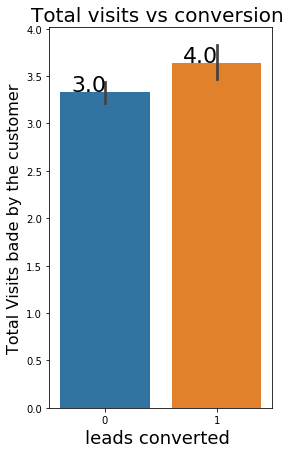

In [18]:
plt.figure(figsize=(4,7))
fig1= sns.barplot(x='Converted', y='TotalVisits', data=score)
plt.xlabel("leads converted ",fontsize=18)
plt.ylabel("Total Visits bade by the customer",fontsize=16)
plt.title("Total visits vs conversion ",fontsize=20)
for i in fig1.patches:
     # get_x pulls left or right; get_height pushes up or down
    fig1.text(i.get_x()+0.1, i.get_height()+0.01, \
            str(round((i.get_height()),0)), fontsize=22, color='black',
                rotation=0)
plt.show()

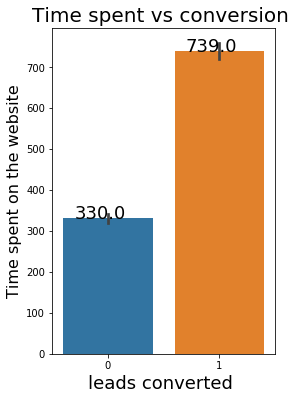

In [19]:
plt.figure(figsize=(4,6))
fig2= sns.barplot(x='Converted', y='Total Time Spent on Website', data=score)
plt.xlabel("leads converted ",fontsize=18)
plt.ylabel("Time spent on the website",fontsize=16)
plt.title("Time spent vs conversion ",fontsize=20)

for i in fig2.patches:
     # get_x pulls left or right; get_height pushes up or down
    fig2.text(i.get_x()+0.1, i.get_height()+0.01, \
            str(round((i.get_height()),0)), fontsize=18, color='black',rotation=0)

plt.show()

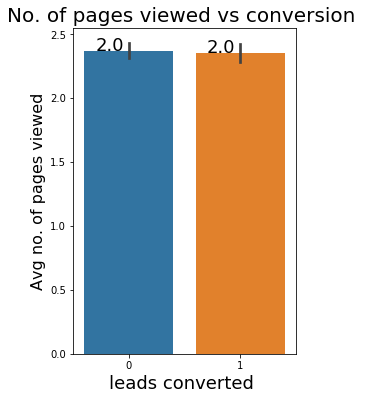

In [20]:
plt.figure(figsize=(4,6))
fig3= sns.barplot(x='Converted', y='Page Views Per Visit', data=score)
plt.xlabel("leads converted ",fontsize=18)
plt.ylabel("Avg no. of pages viewed",fontsize=16)
plt.title("No. of pages viewed vs conversion ",fontsize=20)

for i in fig3.patches:
     # get_x pulls left or right; get_height pushes up or down
    fig3.text(i.get_x()+0.1, i.get_height()+0.001, \
            str(round((i.get_height()),0)), fontsize=18, color='black',rotation=0)

plt.show()

## As this plot shows same value for both the categories ,so it wont be helpful in prediction.

In [21]:
## Imputing with median values for the outliers.
score['TotalVisits'].replace(np.NaN, score['TotalVisits'].median(), inplace=True)

In [22]:
score['Page Views Per Visit'].replace(np.NaN, score['Page Views Per Visit'].median(), inplace=True)

In [23]:
score['Country'].isnull().sum()

2461

### imputing null values of 'country' with the most frequent entry i.e mode.

In [24]:
score['Country'].mode()

0    India
dtype: object

In [25]:
score.loc[pd.isnull(score['Country']), ['Country']]='India'

In [26]:
score['Country']=score['Country'].apply(lambda x:'India' if x=='India' else 'Outside of India')

In [27]:
score['Country'].value_counts()

India               8953
Outside of India     287
Name: Country, dtype: int64

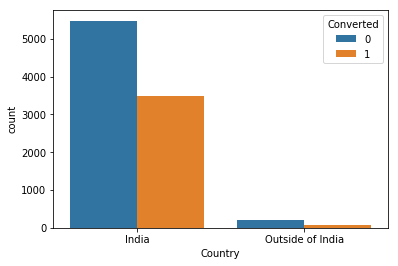

In [28]:
sns.countplot(hue='Converted',x='Country',data=score)
plt.show()

## we cant drop the columns with high null values ,as this will lead to loss of data ,,assigning a unique value to null values.

In [29]:
score.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [30]:
score['City'].isnull().sum()

1420

In [31]:
## creating a new category for null values
score['City'].fillna('unknown',inplace=True)

In [32]:
score['City'].value_counts()

Mumbai                         3222
Select                         2249
unknown                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
score['City'].replace('Select','unknown',inplace=True)
score['City'].value_counts()

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

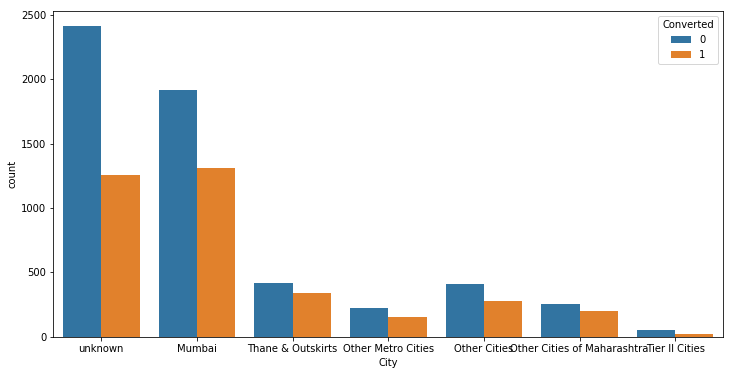

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(hue='Converted',x='City',data=score)
plt.show()

In [35]:
score['Last Activity'].isnull().sum()

103

In [36]:
score['Last Activity'].fillna('unknown',inplace=True)
score['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
unknown                          103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

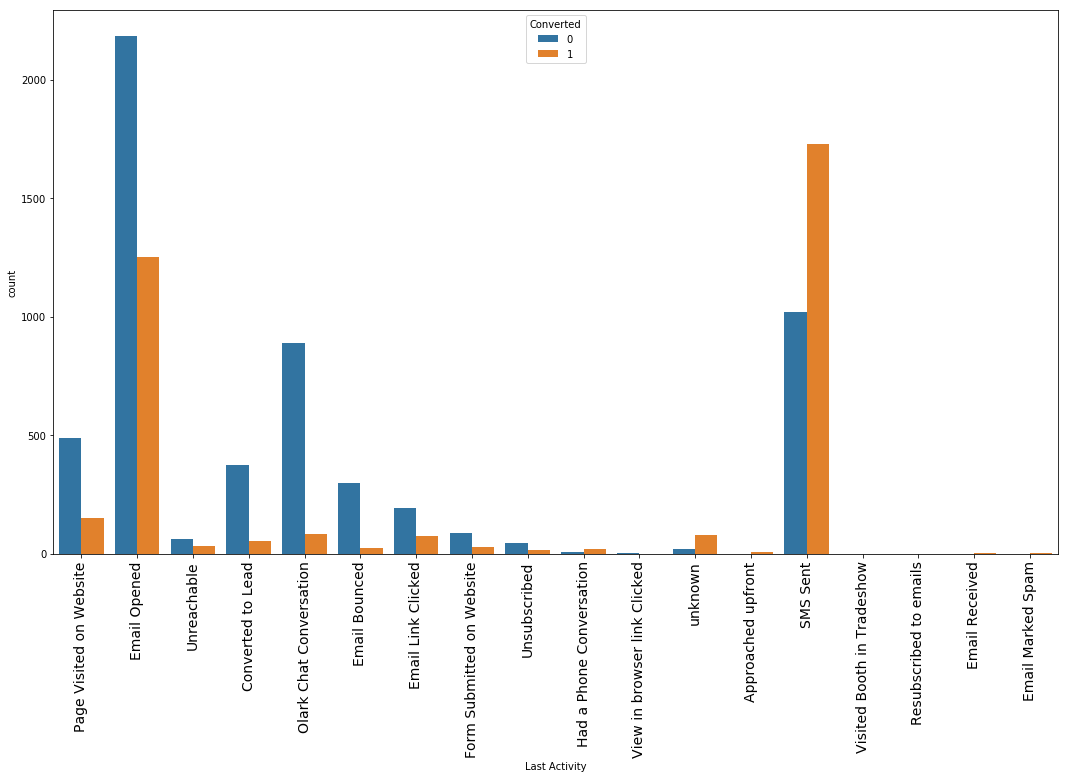

In [37]:
plt.figure(figsize=(18,10))
fig4=sns.countplot(x='Last Activity',hue='Converted',data=score)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [38]:
score['Lead Profile'].isnull().sum()

2709

In [39]:
score['Lead Profile'].fillna('unknown',inplace=True)
score['Lead Profile'].value_counts()

Select                         4146
unknown                        2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

## As the 'select' is as good as null value,as we don't know anything about it,so replacing it with 'unknown'. 

In [40]:
score['Lead Profile'].replace('Select','unknown',inplace=True)
score['Lead Profile'].value_counts()

unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

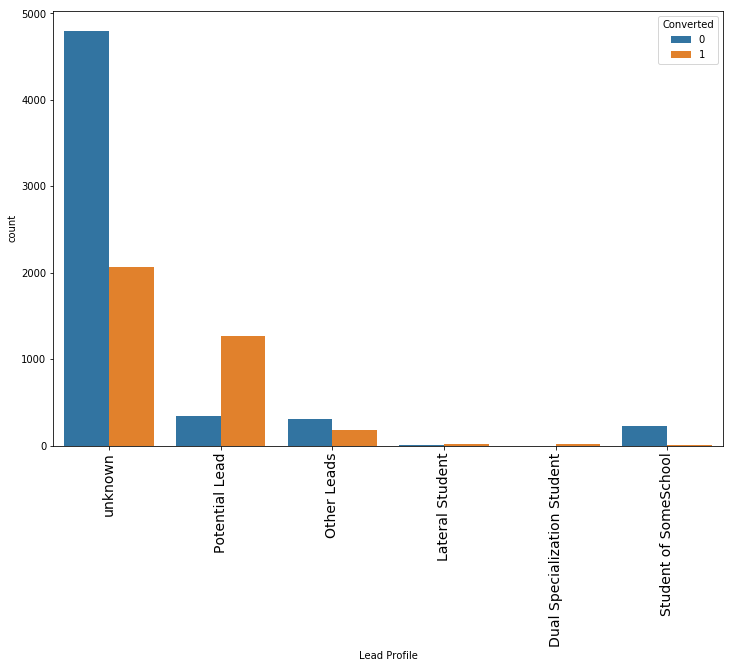

In [41]:
plt.figure(figsize=(12,8))
fig5=sns.countplot(x='Lead Profile',hue='Converted',data=score)
plt.xticks(rotation=90,fontsize=14)
plt.show()

## proceeding further with column 'Specialization'

In [42]:
score['Specialization'].isnull().sum()

1438

In [43]:
score['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
score['Specialization'].fillna('unknown',inplace=True)
score['Specialization'].value_counts()

Select                               1942
unknown                              1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [45]:
score['Specialization'].replace("Select",'unknown',inplace=True)
score['Specialization'].value_counts()

unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

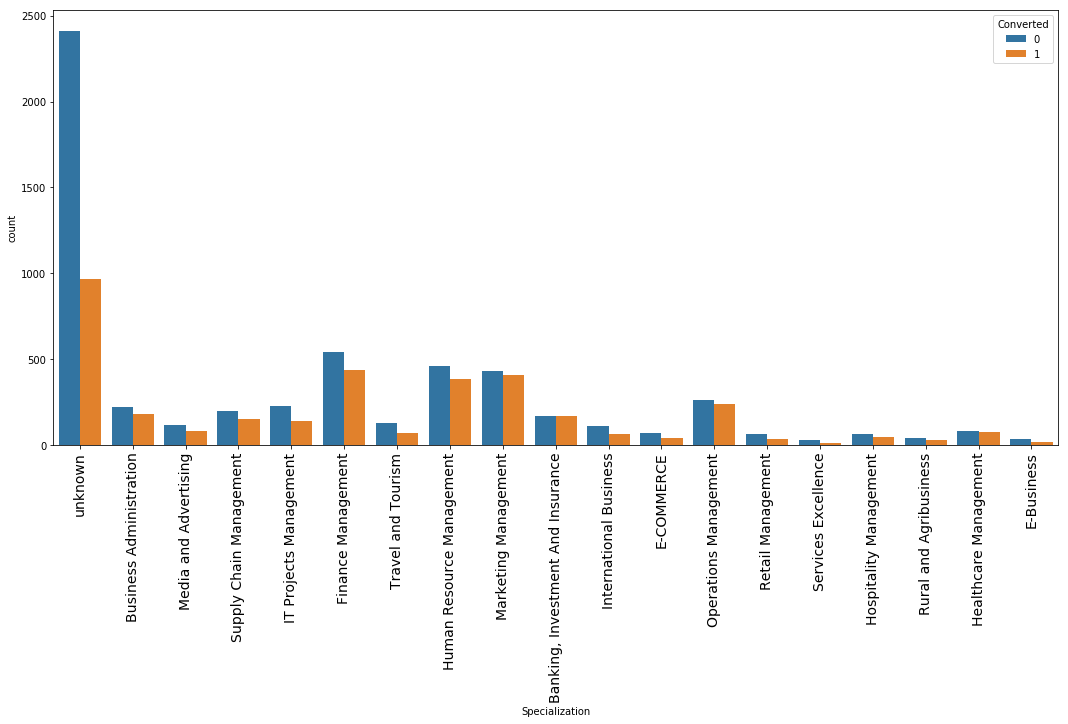

In [46]:
plt.figure(figsize=(18,8))
fig5=sns.countplot(x='Specialization',hue='Converted',data=score)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [47]:
pd.crosstab(score.Specialization,score.Converted,margins=True)

Converted,0,1,All
Specialization,,,
"Banking, Investment And Insurance",171,167,338
Business Administration,224,179,403
E-Business,36,21,57
E-COMMERCE,72,40,112
Finance Management,540,436,976
Healthcare Management,80,79,159
Hospitality Management,66,48,114
Human Resource Management,460,388,848
IT Projects Management,226,140,366


In [48]:
score['What is your current occupation'].isnull().sum()

2690

In [49]:
score['What is your current occupation'].fillna('unknown',inplace=True)
score['What is your current occupation'].value_counts()

Unemployed              5600
unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
pd.crosstab(score['What is your current occupation'],score.Converted,margins=True)

Converted,0,1,All
What is your current occupation,,,
Businessman,3,5,8
Housewife,0,10,10
Other,6,10,16
Student,132,78,210
Unemployed,3159,2441,5600
Working Professional,59,647,706
unknown,2320,370,2690
All,5679,3561,9240


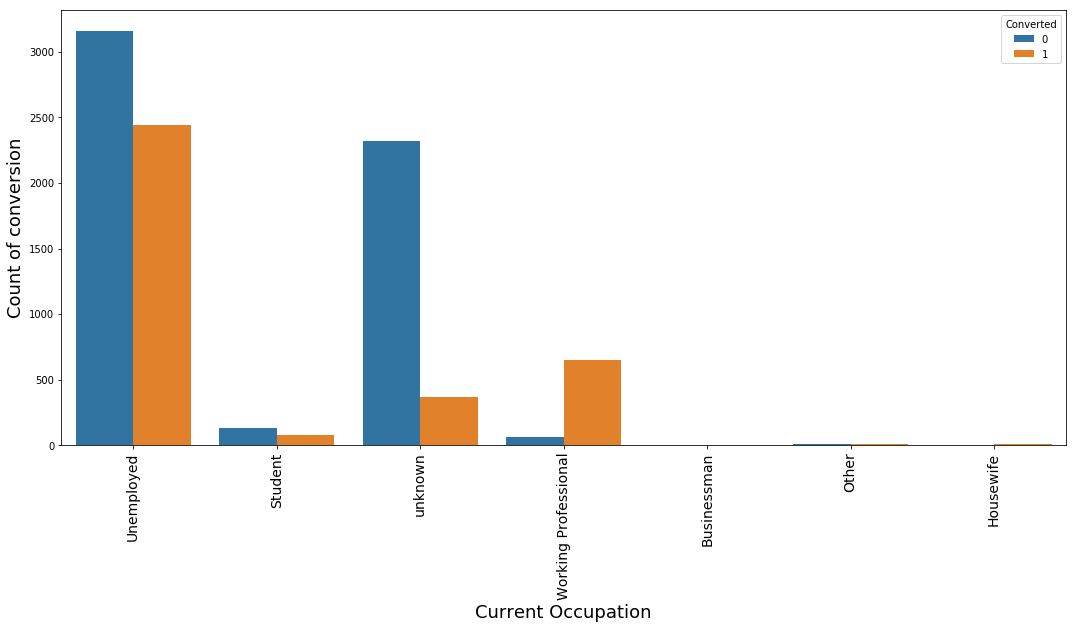

In [51]:
plt.figure(figsize=(18,8))
fig5=sns.countplot(x='What is your current occupation',hue='Converted',data=score)
plt.xlabel("Current Occupation",fontsize=18)
plt.ylabel("Count of conversion",fontsize=18)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [52]:
score['How did you hear about X Education'].isnull().sum()

2207

In [53]:
score['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [54]:
score['How did you hear about X Education'].fillna('unknown',inplace=True)
score['How did you hear about X Education'].value_counts()

Select                   5043
unknown                  2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [55]:
score['How did you hear about X Education'].replace('Select','unknown',inplace=True)
score['How did you hear about X Education'].value_counts()

unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [56]:
pd.crosstab(score['How did you hear about X Education'],score.Converted,margins=True)

Converted,0,1,All
How did you hear about X Education,,,
Advertisements,38,32,70
Email,13,13,26
Multiple Sources,96,56,152
Online Search,465,343,808
Other,111,75,186
SMS,18,5,23
Social Media,39,28,67
Student of SomeSchool,167,143,310
Word Of Mouth,196,152,348


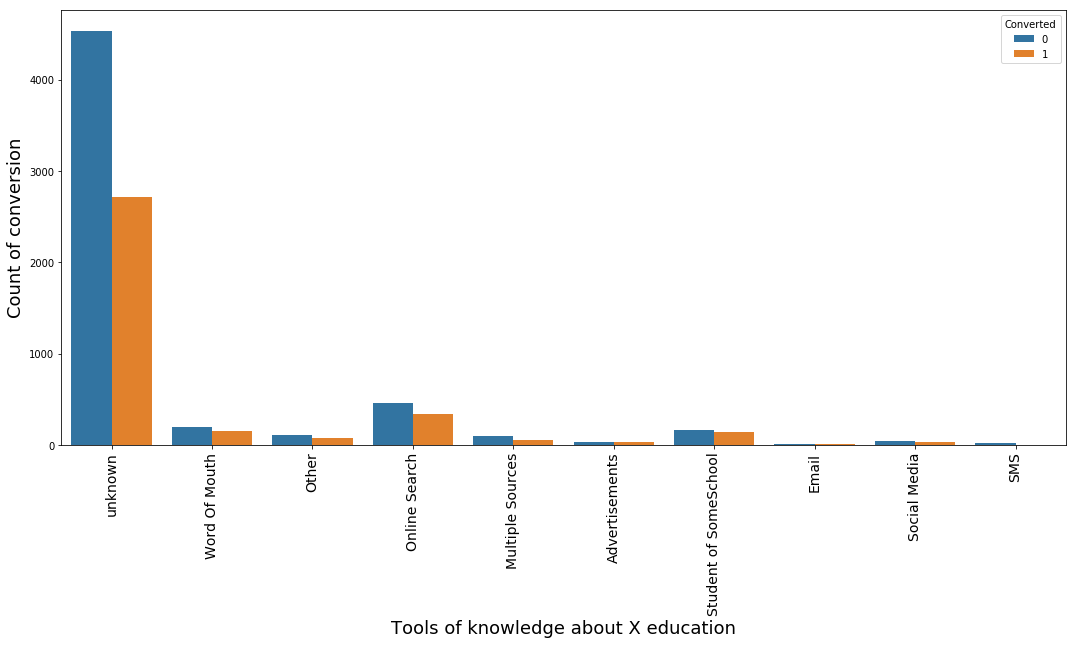

In [57]:
plt.figure(figsize=(18,8))
fig5=sns.countplot(x='How did you hear about X Education',hue='Converted',data=score)
plt.xlabel("Tools of knowledge about X education",fontsize=18)
plt.ylabel("Count of conversion",fontsize=18)
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [58]:
score['What matters most to you in choosing a course'].isnull().sum()

2709

In [59]:
score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [60]:
score['What matters most to you in choosing a course'].fillna('unknown',inplace=True)
score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
unknown                      2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [61]:
pd.crosstab(score['What matters most to you in choosing a course'],score.Converted,margins=True)

Converted,0,1,All
What matters most to you in choosing a course,,,
Better Career Prospects,3338,3190,6528
Flexibility & Convenience,1,1,2
Other,1,0,1
unknown,2339,370,2709
All,5679,3561,9240


In [62]:
score=score[~pd.isnull(score['Lead Source'])]

In [63]:
score.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

## now all the columns with null values are dealt.

In [64]:
## checking for outliers
score.describe(percentiles=[0.05,0.25,0.75,0.90,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9204.000000,9204.000000,9204.000000,9204.000000,9204.000000
mean,617194.608648,0.383746,3.449587,489.005541,2.364923
std,23418.830233,0.486324,4.824662,547.980340,2.145999
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582868.300000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,14.000000,1.000000
50%,615479.000000,0.000000,3.000000,250.000000,2.000000
75%,637409.250000,1.000000,5.000000,938.000000,3.000000
90%,650513.100000,1.000000,7.000000,1380.000000,5.000000
99%,659599.460000,1.000000,17.000000,1839.970000,9.000000


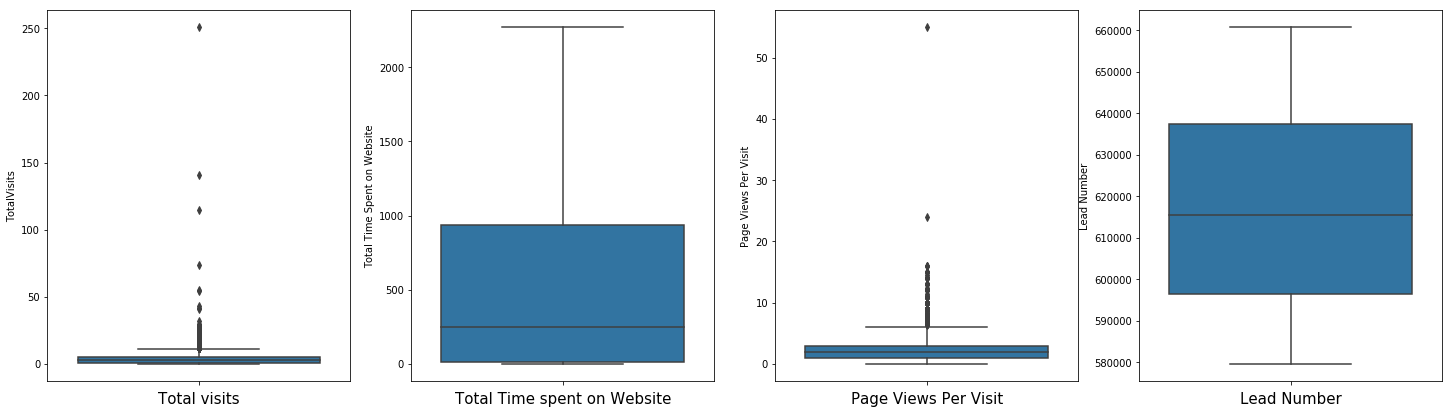

In [65]:
plt.figure(figsize=(25,15))
plt.subplot(2,4,1)
sns.boxplot( y = 'TotalVisits', data =score)
plt.xlabel("Total visits",fontsize=15)


plt.subplot(2,4,2)
sns.boxplot( y = 'Total Time Spent on Website', data = score)
plt.xlabel("Total Time spent on Website",fontsize=15)


plt.subplot(2,4,3)
sns.boxplot( y = 'Page Views Per Visit', data =score)
plt.xlabel("Page Views Per Visit",fontsize=15)

plt.subplot(2,4,4)
sns.boxplot( y = 'Lead Number', data =score)
plt.xlabel("Lead Number",fontsize=15)


plt.show()

In [66]:
score.shape

(9204, 26)

## Removing Outliers.

In [67]:
q1=score['TotalVisits'].quantile(0.05)
q2=score['TotalVisits'].quantile(0.95)
IQR=q2-q1
score=score[(score['TotalVisits'] >= q1) &(score['TotalVisits'] <= q2)]

In [68]:
q1=score['Page Views Per Visit'].quantile(0.05)
q2=score['Page Views Per Visit'].quantile(0.95)
IQR=q2-q1
score=score[(score['Page Views Per Visit'] >= q1) &(score['Page Views Per Visit'] <= q2)]

Text(0.5, 0, 'Page Views Per Visit')

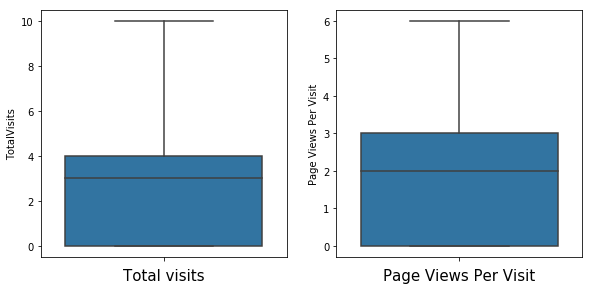

In [69]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot( y = 'TotalVisits', data =score)
plt.xlabel("Total visits",fontsize=15)

plt.subplot(2,3,2)
sns.boxplot( y = 'Page Views Per Visit', data =score)
plt.xlabel("Page Views Per Visit",fontsize=15)


In [70]:
score.shape

(8575, 26)

## Mapping binary categories categorical columns to 0 and 1.

In [71]:
varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
score[varlist] = score[varlist].apply(binary_map)
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,unknown,unknown,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,unknown,unknown,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,Potential Lead,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,unknown,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,unknown,Mumbai,0,Modified


## Creating Dummy variables.

In [72]:
##Dropped those dummy variables, for which either created category or "unknown"
origin=pd.get_dummies(score['Lead Origin'],prefix='org')
origin=origin.drop('org_Lead Add Form', axis=1)
score=pd.concat([score,origin], axis=1)
##------------------------------------------------------------------------------------------------------------------------------

source=pd.get_dummies(score['Lead Source'],prefix='src',drop_first=True)
score=pd.concat([score,source], axis=1)
##-----------------------------------------------------------------------------------------------------------------------------------------


spcial=pd.get_dummies(score['Specialization'],prefix='spc')
spcial=spcial.drop('spc_unknown', axis=1)
score=pd.concat([score,spcial], axis=1)
##--------------------------------------------------------------------------------------------------------------------------------


occup=pd.get_dummies(score['What is your current occupation'],prefix='occp')
occup=occup.drop('occp_unknown', axis=1)
score=pd.concat([score,occup], axis=1)
##-------------------------------------------------------------------------------------------------------------------------------



what=pd.get_dummies(score['What matters most to you in choosing a course'],prefix='wht')
what=what.drop('wht_unknown', axis=1)
score=pd.concat([score,what], axis=1)
##--------------------------------------------------------------------------------------------------------------------------------


last_note=pd.get_dummies(score['Last Notable Activity'],prefix='last_note')
last_note=last_note.drop('last_note_Email Link Clicked',axis=1)
score=pd.concat([score,last_note], axis=1)
##---------------------------------------------------------------------------------------------------------------------------------

cntry=pd.get_dummies(score['Country'],prefix='country',drop_first=True)
score=pd.concat([score,cntry], axis=1)

##---------------------------------------------------------------------------------------------------------------------------
hear=pd.get_dummies(score['How did you hear about X Education'],prefix='hwd')
hear=hear.drop('hwd_unknown',axis=1)
score=pd.concat([score,hear],axis=1)



prof = pd.get_dummies(score['Lead Profile'], prefix='Lead Profile')
prof = prof.drop(['Lead Profile_unknown'],axis= 1)                 
score=pd.concat([score,prof], axis=1)
##--------------------------------------------------------------------------------------------------------------------------             
                 
city = pd.get_dummies(score['City'], prefix='City')
city = city.drop(['City_unknown'], axis=1)  
score=pd.concat([score,city], axis=1)
##-------------------------------------------------------------------------------------------------------------------------------
                 
act = pd.get_dummies(score['Last Activity'], prefix='Last Activity')
act = act.drop(['Last Activity_unknown'],axis=1)     
score=pd.concat([score,act], axis=1)

                 

In [73]:
# We have created dummies for the below variables, so we can drop them
score =score.drop(['Lead Profile','City','What matters most to you in choosing a course','How did you hear about X Education',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity','Prospect ID'], 1)
score.shape

(8575, 117)

In [74]:
score.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
## checking if any categorical columns left
cols = score.columns
num_cols = score._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

## Train-Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
## defining dataframe X
X=score.drop(['Converted','Lead Number'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
## Defining dataframe y
y=score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling.

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.0,0.0,0.000167,0.000333,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


## now inspecting the conversion rate of leads.

In [83]:
converted=(sum(score['Converted'])/len(score['Converted'].index))*100
converted

38.04081632653061

### we have almost 38% leads conversion rate.

## Model Building.

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                          105
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        19:11:59   Pearson chi2:                 5.64e+18
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                       8.517e+14   4.15e+07   2.05e+07      0.000    8.52e+14    8.52e+14
Do Not Email                               -7.544e+14   4.65e+06  -1.62e+08      0.000   -7.54e+14   -7.54e+14
Do Not Call                                  288.2687    2.6e-06   1.11e+08      0.000     288.269     288.269
TotalVisits                                 5.529e+13   1.52e+06   3.65e+07      0.000    5.53e+13    5.53e+13
Total Time Spent on Website                -5.158e+13   1.02e+06  -5.05e+07      0.000   -5.16e+13   -5.16e+13
Page Views Per Visit                       -3.398e+12   1.63e+06  -2.08e+06      0.000    -3.4e+12    -3.4e+12
Search                                      5.644e+14    2.9e+07   1.95e+07      0.000    5.64e+14    5.64e+14
Newspaper Article                           -900.0268   8.32e-06  -1.08e+08      0.000    -900.027    -900.027
X Education Forums                          -256.1054   2.33e-06   -1.1e+08      0.000    -256.105    -256.105
Newspaper                                  -6.382e+15   6.76e+07  -9.45e+07      0.000   -6.38e+15   -6.38e+15
Digital Advertisement                       1.042e+15   4.78e+07   2.18e+07      0.000    1.04e+15    1.04e+15
Through Recommendations                     6.435e+14   4.98e+07   1.29e+07      0.000    6.43e+14    6.43e+14
A free copy of Mastering The Interview     -7.058e+13   3.64e+06  -1.94e+07      0.000   -7.06e+13   -7.06e+13
org_API                                    -1.134e+16   6.74e+07  -1.68e+08      0.000   -1.13e+16   -1.13e+16
org_Landing Page Submission                -1.191e+16   6.76e+07  -1.76e+08      0.000   -1.19e+16   -1.19e+16
org_Lead Import                            -1.572e+15   2.03e+07  -7.74e+07      0.000   -1.57e+15   -1.57e+15
src_Direct Traffic                          9.645e+15   7.81e+07   1.24e+08      0.000    9.64e+15    9.64e+15
src_Facebook                               -1.572e+15   2.03e+07  -7.74e+07      0.000   -1.57e+15   -1.57e+15
src_Google                                  9.814e+15    7.8e+07   1.26e+08      0.000    9.81e+15    9.81e+15
src_Live Chat                               7.321e+14   6.15e+07   1.19e+07      0.000    7.32e+14    7.32e+14
src_NC_EDM                                  1.309e+16   1.04e+08   1.26e+08      0.000    1.31e+16    1.31e+16
src_Olark Chat                              1.018e+16   7.79e+07   1.31e+08      0.000    1.02e+16    1.02e+16
src_Organic Search                          9.663e+15   7.81e+07   1.24e+08      0.000    9.66e+15    9.66e+15
src_Pay per Click Ads                       4.783e+15   1.03e+08   4.64e+07      0.000    4.78e+15    4.78e+15
src_Press_Release                            159.6539   1.59e-06   1.01e+08      0.000     159.654     159.654
src_Reference                              -9.965e+14 

## Feature Selection thru R.F.E

In [86]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [87]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg ,25)
rfe=rfe.fit(X_train, y_train)

In [88]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False])

In [89]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 87),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 53),
 ('Search', False, 23),
 ('Newspaper Article', False, 85),
 ('X Education Forums', False, 84),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 82),
 ('Through Recommendations', False, 30),
 ('A free copy of Mastering The Interview', False, 58),
 ('org_API', True, 1),
 ('org_Landing Page Submission', True, 1),
 ('org_Lead Import', True, 1),
 ('src_Direct Traffic', False, 13),
 ('src_Facebook', True, 1),
 ('src_Google', False, 15),
 ('src_Live Chat', False, 28),
 ('src_NC_EDM', False, 2),
 ('src_Olark Chat', True, 1),
 ('src_Organic Search', False, 14),
 ('src_Pay per Click Ads', False, 48),
 ('src_Press_Release', False, 91),
 ('src_Reference', True, 1),
 ('src_Referral Sites', False, 12),
 ('src_Social Media', False, 68),
 ('src_WeLearn', False, 88),
 ('src_Welingak Website', True, 1),
 ('src_bing', False, 39),

In [90]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'org_Lead Import', 'src_Facebook',
       'src_Olark Chat', 'src_Reference', 'src_Welingak Website',
       'occp_Housewife', 'occp_Unemployed', 'occp_Working Professional',
       'wht_Better Career Prospects', 'last_note_Had a Phone Conversation',
       'last_note_SMS Sent', 'last_note_Unreachable', 'last_note_Unsubscribed',
       'hwd_Email', 'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [91]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'src_Direct Traffic',
       'src_Google', 'src_Live Chat', 'src_NC_EDM', 'src_Organic Search',
       'src_Pay per Click Ads', 'src_Press_Release', 'src_Referral Sites',
       'src_Social Media', 'src_WeLearn', 'src_bing', 'src_blog', 'src_google',
       'src_testone', 'src_welearnblog_Home', 'src_youtubechannel',
       'spc_Banking, Investment And Insurance', 'spc_Business Administration',
       'spc_E-Business', 'spc_E-COMMERCE', 'spc_Finance Management',
       'spc_Healthcare Management', 'spc_Hospitality Management',
       'spc_Human Resource Management', 'spc_IT Projects Management',
       'spc_International Business', 'spc_Marketing Management',
       'spc_Media and Advertising', 'spc_Operations Management',
       'spc_Retail Manage

## Assesing the model with statsmodel.

In [92]:
X_train_sm=sm.add_constant(X_train[col])
logm2= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5977
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2265.3
Date:                Mon, 10 Jun 2019   Deviance:                       4530.6
Time:                        19:12:04   Pearson chi2:                 6.01e+03
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3105      1.135     -0.274      0.784      -2.535       1.914
Do Not Email                                -1.4724      0.195     -7.566      0.000      -1.854      -1.091
Total Time Spent on Website                  1.0174      0.043     23.844      0.000       0.934       1.101
org_API                                     -1.7273      1.134     -1.523      0.128      -3.951       0.496
org_Landing Page Submission                 -2.1166      1.133     -1.869      0.062      -4.336       0.103
org_Lead Import                             -0.8649      0.614     -1.409      0.159      -2.068       0.338
src_Facebook                                -0.8649      0.614     -1.409      0.159      -2.068       0.338
src_Olark Chat                               1.1781      0.130      9.093      0.000       0.924       1.432
src_Reference                                0.8951      1.148      0.780      0.436      -1.355       3.145
src_Welingak Website                         3.8448      1.345      2.859      0.004       1.209       6.481
occp_Housewife                              22.1148   2.45e+04      0.001      0.999   -4.81e+04    4.81e+04
occp_Unemployed                             -0.9219      0.250     -3.694      0.000      -1.411      -0.433
occp_Working Professional                    1.2934      0.309      4.186      0.000       0.688       1.899
wht_Better Career Prospects                  1.6410      0.259      6.337      0.000       1.133       2.148
last_note_Had a Phone Conversation           5.5818      1.668      3.346      0.001       2.312       8.851
last_note_SMS Sent                           1.6907      0.086     19.607      0.000       1.522       1.860
last_note_Unreachable                        1.5402      0.616      2.499      0.012       0.332       2.748
last_note_Unsubscribed                       1.5468      0.517      2.993      0.003       0.534       2.560
hwd_Email                                    1.0438      0.639      1.634      0.102      -0.208       2.296
Lead Profile_Dual Specialization Student    23.4688   2.28e+04      0.001      0.999   -4.47e+04    4.48e+04
Lead Profile_Lateral Student                 3.1427      1.186      2.650      0.008       0.818       5.467
Lead Profile_Potential Lead                  1.6724      0.107     15.585      0.000       1.462       1.883
Lead Profile_Student of SomeSchool          -2.2888      0.430     -5.317      0.000      -3.132      -1.445
Last Activity_Approached upfront            23.4921    2.6e+04      0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Had a Phone Conversation      -3.1714      0.922     -3.440      0.001      -4.979      -1.364
Last Activity_Olark Chat Conversation       -1.5902      0.184     -8.655      0.000      -1.950      -1.230
=

In [93]:
## getting the predicted value on train set
y_train_pred= res.predict(X_train_sm)
y_train_pred[:10]

8529    0.289665
7331    0.127083
7688    0.822469
92      0.042056
4908    0.034323
451     0.119618
4945    0.120802
2844    0.987869
4355    0.148443
7251    0.016960
dtype: float64

In [94]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28966497, 0.12708342, 0.82246867, 0.04205554, 0.03432273,
       0.11961758, 0.12080197, 0.98786883, 0.14844329, 0.01695997])

##### Creating a dataframe with the actual churn flag and the predicted probabilities.

In [95]:
y_train_pred_final= pd .DataFrame({'Converted':y_train.values, 'Conversion_prob':y_train_pred})
y_train_pred_final['LeadID']= y_train.index
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID
0,0,0.289665,8529
1,0,0.127083,7331
2,1,0.822469,7688
3,0,0.042056,92
4,0,0.034323,4908


### creating a new column 'Predicted' with prob>0.5 as 1 else 0.

In [96]:
y_train_pred_final['predicted']= y_train_pred_final.Conversion_prob.map(lambda x:1 if x > 0.5 else 0 )

y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.289665,8529,0
1,0,0.127083,7331,0
2,1,0.822469,7688,1
3,0,0.042056,92,0
4,0,0.034323,4908,0


In [97]:
from sklearn import metrics

In [98]:
# creating confusion matrix
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[3361  375]
 [ 631 1635]]


In [99]:
# Predicted     not_churn    churn
# Actual
# not_churn        3361      375
# churn            631       1635                              

In [100]:
## lets check accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8323892035988004


## now checking VIFs.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd .DataFrame()
vif['features']= X_train[col].columns
vif['VIF']=[variance_inflation_factor( X_train[col].values ,i)  for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif .sort_values(by='VIF',ascending=False)
vif

,features,VIF
4,org_Lead Import,inf
5,src_Facebook,inf
12,wht_Better Career Prospects,33.990000
10,occp_Unemployed,27.250000
11,occp_Working Professional,4.400000
2,org_API,3.240000
3,org_Landing Page Submission,2.680000
6,src_Olark Chat,2.470000
20,Lead Profile_Potential Lead,1.560000
7,src_Reference,1.530000


In [103]:
## dropping columns wiyh vif as inf
col=col.drop('org_Lead Import',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Reference', 'src_Welingak Website', 'occp_Housewife',
       'occp_Unemployed', 'occp_Working Professional',
       'wht_Better Career Prospects', 'last_note_Had a Phone Conversation',
       'last_note_SMS Sent', 'last_note_Unreachable', 'last_note_Unsubscribed',
       'hwd_Email', 'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [104]:
## lets again run the model with remaining features.
X_train_sm=sm.add_constant(X_train[col])
logm3= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5977
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2265.3
Date:                Mon, 10 Jun 2019   Deviance:                       4530.6
Time:                        19:12:05   Pearson chi2:                 6.01e+03
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3105      1.135     -0.274      0.784      -2.535       1.914
Do Not Email                                -1.4724      0.195     -7.566      0.000      -1.854      -1.091
Total Time Spent on Website                  1.0174      0.043     23.844      0.000       0.934       1.101
org_API                                     -1.7273      1.134     -1.523      0.128      -3.951       0.496
org_Landing Page Submission                 -2.1166      1.133     -1.869      0.062      -4.336       0.103
src_Facebook                                -1.7298      1.227     -1.409      0.159      -4.136       0.676
src_Olark Chat                               1.1781      0.130      9.093      0.000       0.924       1.432
src_Reference                                0.8951      1.148      0.780      0.436      -1.355       3.145
src_Welingak Website                         3.8448      1.345      2.859      0.004       1.209       6.481
occp_Housewife                              22.1148   2.45e+04      0.001      0.999   -4.81e+04    4.81e+04
occp_Unemployed                             -0.9219      0.250     -3.694      0.000      -1.411      -0.433
occp_Working Professional                    1.2934      0.309      4.186      0.000       0.688       1.899
wht_Better Career Prospects                  1.6410      0.259      6.337      0.000       1.133       2.148
last_note_Had a Phone Conversation           5.5818      1.668      3.346      0.001       2.312       8.851
last_note_SMS Sent                           1.6907      0.086     19.607      0.000       1.522       1.860
last_note_Unreachable                        1.5402      0.616      2.499      0.012       0.332       2.748
last_note_Unsubscribed                       1.5468      0.517      2.993      0.003       0.534       2.560
hwd_Email                                    1.0438      0.639      1.634      0.102      -0.208       2.296
Lead Profile_Dual Specialization Student    23.4688   2.28e+04      0.001      0.999   -4.47e+04    4.48e+04
Lead Profile_Lateral Student                 3.1427      1.186      2.650      0.008       0.818       5.467
Lead Profile_Potential Lead                  1.6724      0.107     15.585      0.000       1.462       1.883
Lead Profile_Student of SomeSchool          -2.2888      0.430     -5.317      0.000      -3.132      -1.445
Last Activity_Approached upfront            23.4921    2.6e+04      0.001      0.999    -5.1e+04     5.1e+04
Last Activity_Had a Phone Conversation      -3.1714      0.922     -3.440      0.001      -4.979      -1.364
Last Activity_Olark Chat Conversation       -1.5902      0.184     -8.655      0.000      -1.950      -1.230
============================================================================================================
"

In [105]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [106]:
y_train_pred[:10]

array([0.28966497, 0.12708342, 0.82246867, 0.04205554, 0.03432273,
       0.11961758, 0.12080197, 0.98786883, 0.14844329, 0.01695997])

In [107]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [108]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.289665,8529,0
1,0,0.127083,7331,0
2,1,0.822469,7688,1
3,0,0.042056,92,0
4,0,0.034323,4908,0


In [109]:
## cheking the accuracy again..
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8323892035988004


In [110]:
# Check the vif again
vif=pd .DataFrame()
vif['features']= X_train[col].columns
vif['VIF']=[variance_inflation_factor( X_train[col].values ,i)  for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif .sort_values(by='VIF',ascending=False)
vif

,features,VIF
11,wht_Better Career Prospects,33.99
9,occp_Unemployed,27.25
10,occp_Working Professional,4.40
2,org_API,3.24
3,org_Landing Page Submission,2.68
5,src_Olark Chat,2.47
19,Lead Profile_Potential Lead,1.56
22,Last Activity_Had a Phone Conversation,1.53
6,src_Reference,1.53
12,last_note_Had a Phone Conversation,1.51


In [111]:
col=col.drop('wht_Better Career Prospects',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Reference', 'src_Welingak Website', 'occp_Housewife',
       'occp_Unemployed', 'occp_Working Professional',
       'last_note_Had a Phone Conversation', 'last_note_SMS Sent',
       'last_note_Unreachable', 'last_note_Unsubscribed', 'hwd_Email',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [112]:
## lets again run the model with remaining features.
X_train_sm=sm.add_constant(X_train[col])
logm4= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5978
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2285.9
Date:                Mon, 10 Jun 2019   Deviance:                       4571.9
Time:                        19:12:07   Pearson chi2:                 6.10e+03
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1828      1.135     -0.161      0.872      -2.406       2.041
Do Not Email                                -1.5028      0.194     -7.738      0.000      -1.883      -1.122
Total Time Spent on Website                  1.0185      0.042     23.971      0.000       0.935       1.102
org_API                                     -1.7233      1.135     -1.519      0.129      -3.947       0.500
org_Landing Page Submission                 -2.0886      1.133     -1.844      0.065      -4.309       0.131
src_Facebook                                -1.7354      1.228     -1.414      0.157      -4.142       0.671
src_Olark Chat                               1.1673      0.129      9.051      0.000       0.915       1.420
src_Reference                                0.9771      1.148      0.851      0.395      -1.274       3.228
src_Welingak Website                         3.8938      1.345      2.895      0.004       1.258       6.530
occp_Housewife                              23.5647   2.44e+04      0.001      0.999   -4.78e+04    4.78e+04
occp_Unemployed                              0.5521      0.089      6.232      0.000       0.378       0.726
occp_Working Professional                    2.7297      0.206     13.223      0.000       2.325       3.134
last_note_Had a Phone Conversation           5.5869      1.653      3.380      0.001       2.347       8.827
last_note_SMS Sent                           1.6967      0.086     19.727      0.000       1.528       1.865
last_note_Unreachable                        1.4860      0.611      2.434      0.015       0.289       2.683
last_note_Unsubscribed                       1.5447      0.515      2.999      0.003       0.535       2.554
hwd_Email                                    1.0365      0.636      1.630      0.103      -0.210       2.283
Lead Profile_Dual Specialization Student    23.4953   2.29e+04      0.001      0.999   -4.48e+04    4.48e+04
Lead Profile_Lateral Student                 3.1589      1.188      2.659      0.008       0.831       5.487
Lead Profile_Potential Lead                  1.7459      0.107     16.304      0.000       1.536       1.956
Lead Profile_Student of SomeSchool          -1.7777      0.427     -4.167      0.000      -2.614      -0.942
Last Activity_Approached upfront            23.5140   2.59e+04      0.001      0.999   -5.07e+04    5.08e+04
Last Activity_Had a Phone Conversation      -3.2432      0.921     -3.521      0.000      -5.049      -1.438
Last Activity_Olark Chat Conversation       -1.5838      0.182     -8.692      0.000      -1.941      -1.227
============================================================================================================
"""

In [113]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [114]:
y_train_pred[:10]

array([0.2883706 , 0.1258035 , 0.82193334, 0.04875962, 0.03876317,
       0.11839483, 0.11957003, 0.98737328, 0.16424836, 0.0270013 ])

In [115]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [116]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.288371,8529,0
1,0,0.125803,7331,0
2,1,0.821933,7688,1
3,0,0.048760,92,0
4,0,0.038763,4908,0


In [117]:
## cheking the accuracy again..
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8327224258580473


In [118]:
## checking vif again
vif=pd .DataFrame()
vif['features']= X_train[col].columns
vif['VIF']=[variance_inflation_factor( X_train[col].values ,i)  for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif .sort_values(by='VIF',ascending=False)
vif

,features,VIF
9,occp_Unemployed,3.31
2,org_API,3.15
3,org_Landing Page Submission,2.55
5,src_Olark Chat,2.47
10,occp_Working Professional,1.57
18,Lead Profile_Potential Lead,1.54
21,Last Activity_Had a Phone Conversation,1.53
11,last_note_Had a Phone Conversation,1.51
22,Last Activity_Olark Chat Conversation,1.50
6,src_Reference,1.50


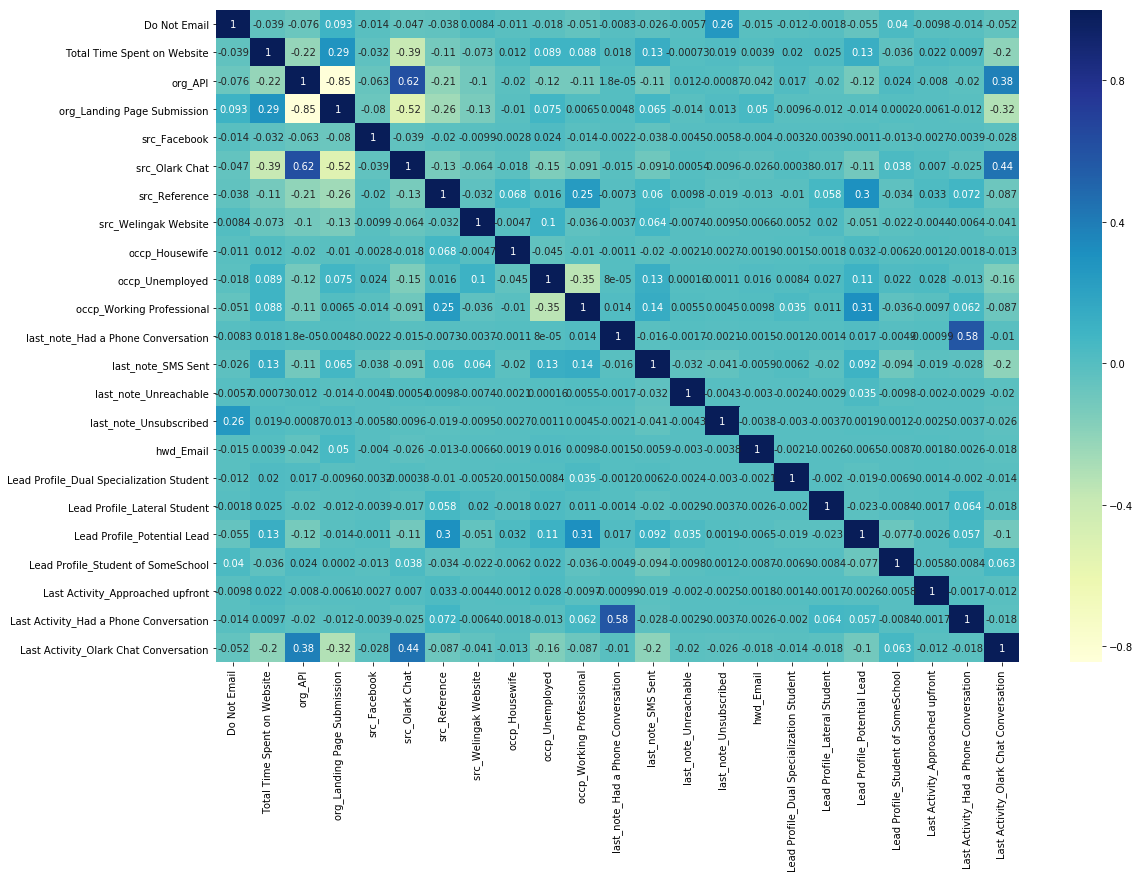

In [119]:
# the multi collinearity has been dealt with,plotting the heat map for the same.
plt.figure(figsize=(18,12))
cor=X_train[col].corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [120]:
## now dropping column with high p value.
col=col.drop('occp_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Reference', 'src_Welingak Website', 'occp_Unemployed',
       'occp_Working Professional', 'last_note_Had a Phone Conversation',
       'last_note_SMS Sent', 'last_note_Unreachable', 'last_note_Unsubscribed',
       'hwd_Email', 'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Approached upfront',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [121]:
## lets again run the model with remaining features.
X_train_sm=sm.add_constant(X_train[col])
logm5= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5979
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2291.2
Date:                Mon, 10 Jun 2019   Deviance:                       4582.4
Time:                        19:12:11   Pearson chi2:                 6.13e+03
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1629      1.135     -0.144      0.886      -2.387       2.061
Do Not Email                                -1.5089      0.194     -7.765      0.000      -1.890      -1.128
Total Time Spent on Website                  1.0195      0.042     24.019      0.000       0.936       1.103
org_API                                     -1.7272      1.135     -1.522      0.128      -3.951       0.497
org_Landing Page Submission                 -2.0878      1.133     -1.843      0.065      -4.308       0.132
src_Facebook                                -1.7395      1.228     -1.417      0.157      -4.146       0.667
src_Olark Chat                               1.1660      0.129      9.048      0.000       0.913       1.419
src_Reference                                1.0256      1.148      0.893      0.372      -1.225       3.277
src_Welingak Website                         3.8973      1.345      2.898      0.004       1.261       6.533
occp_Unemployed                              0.5319      0.088      6.039      0.000       0.359       0.705
occp_Working Professional                    2.7077      0.206     13.127      0.000       2.303       3.112
last_note_Had a Phone Conversation           5.6174      1.652      3.400      0.001       2.379       8.856
last_note_SMS Sent                           1.6926      0.086     19.680      0.000       1.524       1.861
last_note_Unreachable                        1.4793      0.610      2.425      0.015       0.284       2.675
last_note_Unsubscribed                       1.5461      0.515      3.002      0.003       0.537       2.556
hwd_Email                                    1.0345      0.635      1.628      0.103      -0.211       2.280
Lead Profile_Dual Specialization Student    23.4976   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Lead Profile_Lateral Student                 3.1523      1.188      2.652      0.008       0.823       5.482
Lead Profile_Potential Lead                  1.7518      0.107     16.380      0.000       1.542       1.961
Lead Profile_Student of SomeSchool          -1.7821      0.427     -4.174      0.000      -2.619      -0.945
Last Activity_Approached upfront            23.5110   2.58e+04      0.001      0.999   -5.06e+04    5.06e+04
Last Activity_Had a Phone Conversation      -3.2833      0.922     -3.559      0.000      -5.091      -1.475
Last Activity_Olark Chat Conversation       -1.5886      0.182     -8.722      0.000      -1.946      -1.232
============================================================================================================
"""

In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [123]:
y_train_pred[:10]

array([0.28742928, 0.12583397, 0.82163571, 0.04969242, 0.03909471,
       0.11841615, 0.11959278, 0.98733384, 0.16613321, 0.02676196])

In [124]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [125]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.287429,8529,0
1,0,0.125834,7331,0
2,1,0.821636,7688,1
3,0,0.049692,92,0
4,0,0.039095,4908,0


In [126]:
## cheking the accuracy again..
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8315561479506831


In [127]:
## checking vif again
vif=pd .DataFrame()
vif['features']= X_train[col].columns
vif['VIF']=[variance_inflation_factor( X_train[col].values ,i)  for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif .sort_values(by='VIF',ascending=False)
vif

,features,VIF
8,occp_Unemployed,3.29
2,org_API,3.14
3,org_Landing Page Submission,2.54
5,src_Olark Chat,2.47
9,occp_Working Professional,1.57
17,Lead Profile_Potential Lead,1.54
20,Last Activity_Had a Phone Conversation,1.53
10,last_note_Had a Phone Conversation,1.51
21,Last Activity_Olark Chat Conversation,1.50
6,src_Reference,1.49


In [128]:
## dropping high p value feautures
col=col.drop('Last Activity_Approached upfront',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Reference', 'src_Welingak Website', 'occp_Unemployed',
       'occp_Working Professional', 'last_note_Had a Phone Conversation',
       'last_note_SMS Sent', 'last_note_Unreachable', 'last_note_Unsubscribed',
       'hwd_Email', 'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [129]:
## lets again run the model with remaining features.
X_train_sm=sm.add_constant(X_train[col])
logm6= sm.GLM(y_train,X_train_sm, family= sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5980
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.1
Date:                Mon, 10 Jun 2019   Deviance:                       4592.1
Time:                        19:12:12   Pearson chi2:                 6.14e+03
No. Iterations:                    21   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1636      1.135     -0.144      0.885      -2.388       2.061
Do Not Email                                -1.5124      0.194     -7.786      0.000      -1.893      -1.132
Total Time Spent on Website                  1.0224      0.042     24.101      0.000       0.939       1.106
org_API                                     -1.7306      1.135     -1.525      0.127      -3.955       0.494
org_Landing Page Submission                 -2.0874      1.133     -1.842      0.065      -4.308       0.133
src_Facebook                                -1.7432      1.228     -1.419      0.156      -4.150       0.664
src_Olark Chat                               1.1813      0.129      9.176      0.000       0.929       1.434
src_Reference                                1.0291      1.149      0.896      0.370      -1.222       3.280
src_Welingak Website                         3.8942      1.345      2.895      0.004       1.258       6.531
occp_Unemployed                              0.5410      0.088      6.147      0.000       0.368       0.713
occp_Working Professional                    2.7112      0.206     13.145      0.000       2.307       3.115
last_note_Had a Phone Conversation           5.6141      1.653      3.397      0.001       2.375       8.853
last_note_SMS Sent                           1.6850      0.086     19.608      0.000       1.517       1.853
last_note_Unreachable                        1.4760      0.610      2.419      0.016       0.280       2.672
last_note_Unsubscribed                       1.5424      0.515      2.993      0.003       0.532       2.552
hwd_Email                                    1.0295      0.635      1.620      0.105      -0.216       2.275
Lead Profile_Dual Specialization Student    22.4894   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
Lead Profile_Lateral Student                 3.1433      1.188      2.645      0.008       0.814       5.473
Lead Profile_Potential Lead                  1.7449      0.107     16.323      0.000       1.535       1.954
Lead Profile_Student of SomeSchool          -1.7920      0.427     -4.195      0.000      -2.629      -0.955
Last Activity_Had a Phone Conversation      -3.2835      0.922     -3.561      0.000      -5.091      -1.476
Last Activity_Olark Chat Conversation       -1.5984      0.182     -8.778      0.000      -1.955      -1.241
============================================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [131]:
y_train_pred[:10]

array([0.28718301, 0.12673838, 0.82246739, 0.0495885 , 0.03905897,
       0.11925396, 0.12044114, 0.98735841, 0.1673558 , 0.02660329])

In [132]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [133]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.287183,8529,0
1,0,0.126738,7331,0
2,1,0.822467,7688,1
3,0,0.049588,92,0
4,0,0.039059,4908,0


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8310563145618127


In [135]:
## checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,occp_Unemployed,3.29
2,org_API,3.14
3,org_Landing Page Submission,2.54
5,src_Olark Chat,2.47
9,occp_Working Professional,1.57
17,Lead Profile_Potential Lead,1.54
19,Last Activity_Had a Phone Conversation,1.53
10,last_note_Had a Phone Conversation,1.51
20,Last Activity_Olark Chat Conversation,1.50
6,src_Reference,1.49


In [136]:
col=col.drop('src_Reference',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Welingak Website', 'occp_Unemployed', 'occp_Working Professional',
       'last_note_Had a Phone Conversation', 'last_note_SMS Sent',
       'last_note_Unreachable', 'last_note_Unsubscribed', 'hwd_Email',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [137]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2296.4
Date:                Mon, 10 Jun 2019   Deviance:                       4592.8
Time:                        19:12:14   Pearson chi2:                 6.13e+03
No. Iterations:                    21   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.8429      0.216      3.907      0.000       0.420       1.266
Do Not Email                                -1.5106      0.194     -7.782      0.000      -1.891      -1.130
Total Time Spent on Website                  1.0223      0.042     24.098      0.000       0.939       1.105
org_API                                     -2.7364      0.221    -12.367      0.000      -3.170      -2.303
org_Landing Page Submission                 -3.0932      0.211    -14.629      0.000      -3.508      -2.679
src_Facebook                                -2.7493      0.518     -5.308      0.000      -3.764      -1.734
src_Olark Chat                               1.1809      0.129      9.172      0.000       0.929       1.433
src_Welingak Website                         2.8876      0.754      3.831      0.000       1.410       4.365
occp_Unemployed                              0.5408      0.088      6.147      0.000       0.368       0.713
occp_Working Professional                    2.7123      0.206     13.154      0.000       2.308       3.116
last_note_Had a Phone Conversation           5.5964      1.652      3.388      0.001       2.359       8.834
last_note_SMS Sent                           1.6838      0.086     19.599      0.000       1.515       1.852
last_note_Unreachable                        1.4759      0.610      2.419      0.016       0.280       2.672
last_note_Unsubscribed                       1.5403      0.515      2.990      0.003       0.531       2.550
hwd_Email                                    1.0292      0.635      1.620      0.105      -0.216       2.274
Lead Profile_Dual Specialization Student    22.4889   1.39e+04      0.002      0.999   -2.72e+04    2.72e+04
Lead Profile_Lateral Student                 3.1470      1.188      2.648      0.008       0.818       5.476
Lead Profile_Potential Lead                  1.7436      0.107     16.316      0.000       1.534       1.953
Lead Profile_Student of SomeSchool          -1.7915      0.427     -4.196      0.000      -2.628      -0.955
Last Activity_Had a Phone Conversation      -3.2663      0.921     -3.546      0.000      -5.072      -1.461
Last Activity_Olark Chat Conversation       -1.5985      0.182     -8.779      0.000      -1.955      -1.242
============================================================================================================
"""

In [138]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [139]:
y_train_pred[:10]

array([0.28705367, 0.12679527, 0.82233031, 0.0496227 , 0.03906872,
       0.11930887, 0.12049637, 0.98736093, 0.16740902, 0.02663028])

In [140]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [141]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.287054,8529,0
1,0,0.126795,7331,0
2,1,0.822330,7688,1
3,0,0.049623,92,0
4,0,0.039069,4908,0


In [142]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8310563145618127


In [143]:
# check the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,org_API,2.95
7,occp_Unemployed,2.93
5,src_Olark Chat,2.47
3,org_Landing Page Submission,2.25
18,Last Activity_Had a Phone Conversation,1.52
9,last_note_Had a Phone Conversation,1.51
19,Last Activity_Olark Chat Conversation,1.49
16,Lead Profile_Potential Lead,1.45
10,last_note_SMS Sent,1.44
8,occp_Working Professional,1.42


In [144]:
## dropping column with high p value
col=col.drop('Lead Profile_Dual Specialization Student',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Welingak Website', 'occp_Unemployed', 'occp_Working Professional',
       'last_note_Had a Phone Conversation', 'last_note_SMS Sent',
       'last_note_Unreachable', 'last_note_Unsubscribed', 'hwd_Email',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [145]:
## building the model again
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5982
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2303.0
Date:                Mon, 10 Jun 2019   Deviance:                       4606.0
Time:                        19:12:14   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8398      0.216      3.893      0.000       0.417       1.263
Do Not Email                              -1.5158      0.194     -7.810      0.000      -1.896      -1.135
Total Time Spent on Website                1.0248      0.042     24.159      0.000       0.942       1.108
org_API                                   -2.7276      0.221    -12.334      0.000      -3.161      -2.294
org_Landing Page Submission               -3.0897      0.211    -14.616      0.000      -3.504      -2.675
src_Facebook                              -2.7514      0.518     -5.310      0.000      -3.767      -1.736
src_Olark Chat                             1.1772      0.128      9.162      0.000       0.925       1.429
src_Welingak Website                       2.8854      0.754      3.828      0.000       1.408       4.363
occp_Unemployed                            0.5510      0.088      6.269      0.000       0.379       0.723
occp_Working Professional                  2.7390      0.206     13.309      0.000       2.336       3.142
last_note_Had a Phone Conversation         5.5978      1.654      3.385      0.001       2.356       8.839
last_note_SMS Sent                         1.6776      0.086     19.554      0.000       1.509       1.846
last_note_Unreachable                      1.4694      0.610      2.407      0.016       0.273       2.666
last_note_Unsubscribed                     1.5357      0.515      2.980      0.003       0.526       2.546
hwd_Email                                  1.0199      0.636      1.604      0.109      -0.226       2.266
Lead Profile_Lateral Student               3.1399      1.190      2.639      0.008       0.808       5.472
Lead Profile_Potential Lead                1.7332      0.107     16.225      0.000       1.524       1.943
Lead Profile_Student of SomeSchool        -1.8035      0.427     -4.221      0.000      -2.641      -0.966
Last Activity_Had a Phone Conversation    -3.2740      0.922     -3.550      0.000      -5.081      -1.467
Last Activity_Olark Chat Conversation     -1.6047      0.182     -8.813      0.000      -1.962      -1.248
==========================================================================================================
"""

In [146]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [147]:
y_train_pred[:10]

array([0.28752007, 0.12791873, 0.82354568, 0.04956251, 0.03883163,
       0.1203569 , 0.12155637, 0.98768772, 0.16739414, 0.02670399])

In [148]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [149]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.287520,8529,0
1,0,0.127919,7331,0
2,1,0.823546,7688,1
3,0,0.049563,92,0
4,0,0.038832,4908,0


In [150]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.829723425524825


In [151]:
# check the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,org_API,2.95
7,occp_Unemployed,2.93
5,src_Olark Chat,2.47
3,org_Landing Page Submission,2.25
17,Last Activity_Had a Phone Conversation,1.52
9,last_note_Had a Phone Conversation,1.51
18,Last Activity_Olark Chat Conversation,1.49
15,Lead Profile_Potential Lead,1.45
10,last_note_SMS Sent,1.44
8,occp_Working Professional,1.42


In [152]:
## dropping high p value feature
col=col.drop('hwd_Email',1)
col.shape

(18,)

In [153]:
col

Index(['Do Not Email', 'Total Time Spent on Website', 'org_API',
       'org_Landing Page Submission', 'src_Facebook', 'src_Olark Chat',
       'src_Welingak Website', 'occp_Unemployed', 'occp_Working Professional',
       'last_note_Had a Phone Conversation', 'last_note_SMS Sent',
       'last_note_Unreachable', 'last_note_Unsubscribed',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation'],
      dtype='object')

In [154]:
## building the model again
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5983
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2304.2
Date:                Mon, 10 Jun 2019   Deviance:                       4608.4
Time:                        19:12:15   Pearson chi2:                 6.15e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8372      0.216      3.881      0.000       0.414       1.260
Do Not Email                              -1.5194      0.194     -7.833      0.000      -1.900      -1.139
Total Time Spent on Website                1.0228      0.042     24.143      0.000       0.940       1.106
org_API                                   -2.7251      0.221    -12.325      0.000      -3.158      -2.292
org_Landing Page Submission               -3.0811      0.211    -14.582      0.000      -3.495      -2.667
src_Facebook                              -2.7510      0.518     -5.311      0.000      -3.766      -1.736
src_Olark Chat                             1.1752      0.128      9.150      0.000       0.923       1.427
src_Welingak Website                       2.8849      0.754      3.828      0.000       1.408       4.362
occp_Unemployed                            0.5539      0.088      6.306      0.000       0.382       0.726
occp_Working Professional                  2.7511      0.206     13.367      0.000       2.348       3.155
last_note_Had a Phone Conversation         5.5950      1.654      3.382      0.001       2.353       8.837
last_note_SMS Sent                         1.6746      0.086     19.536      0.000       1.507       1.843
last_note_Unreachable                      1.4657      0.610      2.401      0.016       0.269       2.662
last_note_Unsubscribed                     1.5352      0.515      2.979      0.003       0.525       2.545
Lead Profile_Lateral Student               3.1369      1.190      2.635      0.008       0.804       5.470
Lead Profile_Potential Lead                1.7302      0.107     16.202      0.000       1.521       1.939
Lead Profile_Student of SomeSchool        -1.8078      0.427     -4.231      0.000      -2.645      -0.970
Last Activity_Had a Phone Conversation    -3.2789      0.923     -3.553      0.000      -5.087      -1.470
Last Activity_Olark Chat Conversation     -1.6053      0.182     -8.818      0.000      -1.962      -1.248
==========================================================================================================
"""

In [155]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [156]:
y_train_pred[:10]

array([0.28910913, 0.1289744 , 0.82396311, 0.04991375, 0.03879564,
       0.12137361, 0.12257939, 0.98781772, 0.16733747, 0.02668988])

In [157]:
y_train_pred_final['Conversion_prob'] = y_train_pred

In [158]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted
0,0,0.289109,8529,0
1,0,0.128974,7331,0
2,1,0.823963,7688,1
3,0,0.049914,92,0
4,0,0.038796,4908,0


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8292235921359546


In [160]:
#check the vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,org_API,2.95
7,occp_Unemployed,2.92
5,src_Olark Chat,2.47
3,org_Landing Page Submission,2.24
16,Last Activity_Had a Phone Conversation,1.52
9,last_note_Had a Phone Conversation,1.51
17,Last Activity_Olark Chat Conversation,1.49
14,Lead Profile_Potential Lead,1.45
10,last_note_SMS Sent,1.44
8,occp_Working Professional,1.42


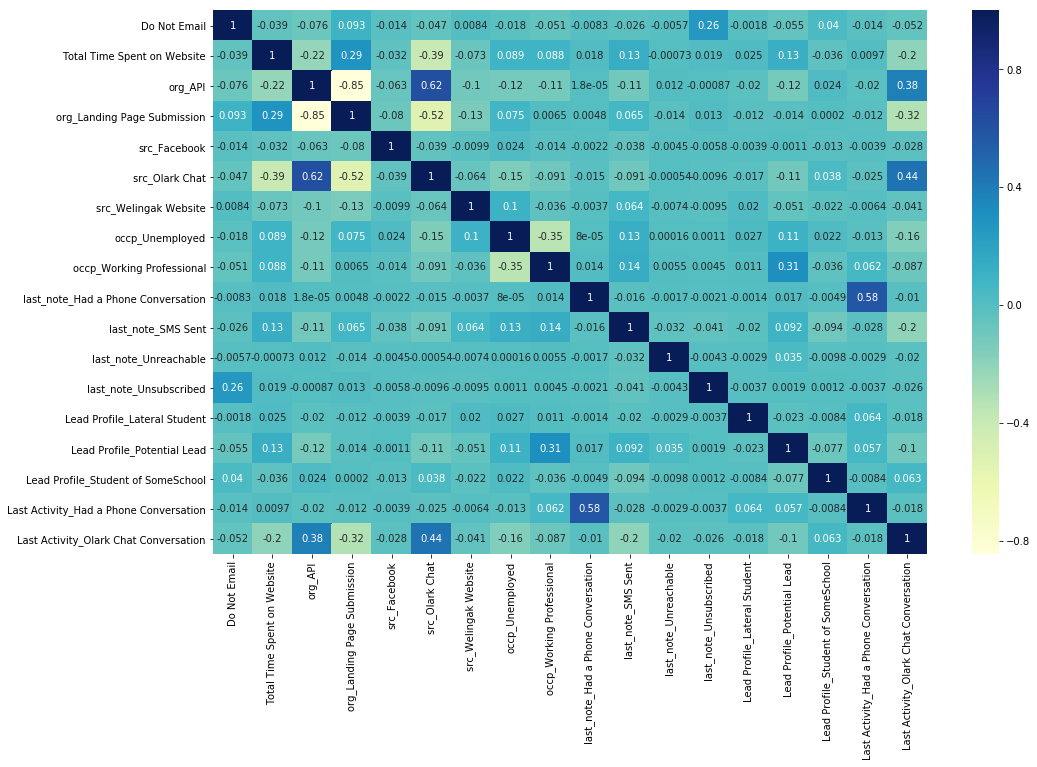

In [161]:
##plottin a heatmap to see correlation
plt.figure(figsize=(16,10))
cor=X_train[col].corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

###  All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [162]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3349,  387],
       [ 638, 1628]], dtype=int64)

In [163]:
# Actual/Predicted     not_churn    churn
        # not_churn        3349      387
        # churn            638       1628  

In [164]:
## others metrics

In [165]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7184466019417476

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.8964132762312634

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10358672376873662


In [169]:
# positive predictive value 
print (TP / float(TP+FP))

0.8079404466501241


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8399799347880612


## Plotting ROC curve.

In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_prob, drop_intermediate = False )

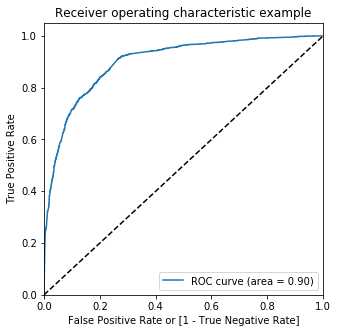

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

## finding optimal cutoff.

In [174]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.289109,8529,0,1,1,1,0,0,0,0,0,0,0
1,0,0.128974,7331,0,1,1,0,0,0,0,0,0,0,0
2,1,0.823963,7688,1,1,1,1,1,1,1,1,1,1,0
3,0,0.049914,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.038796,4908,0,1,0,0,0,0,0,0,0,0,0


In [175]:
##  Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df= pd.DataFrame( columns= ['prob','acc','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob       acc     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.662113  0.966902  0.477248
0.2   0.2  0.791736  0.924095  0.711456
0.3   0.3  0.810397  0.852162  0.785064
0.4   0.4  0.821726  0.778023  0.848233
0.5   0.5  0.829224  0.718447  0.896413
0.6   0.6  0.824892  0.665490  0.921574
0.7   0.7  0.799400  0.549868  0.950749
0.8   0.8  0.774742  0.454104  0.969218
0.9   0.9  0.736255  0.322154  0.987420


### Lets plot sensitivity ,specificity,accuracy for all probs.

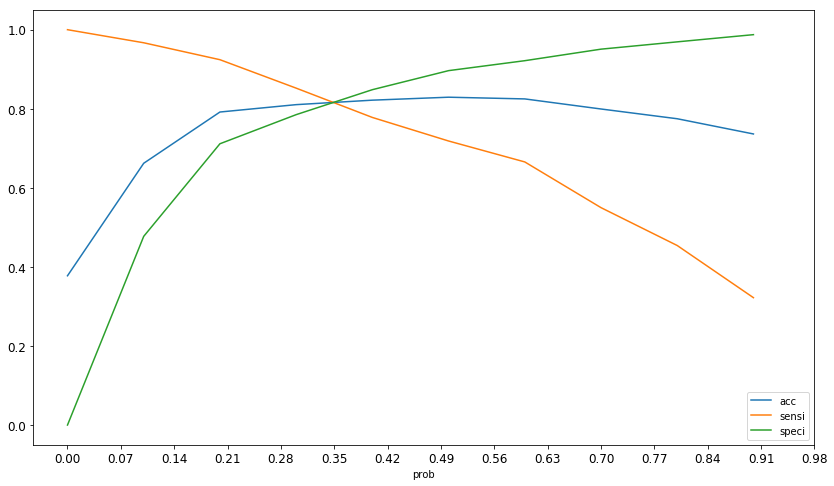

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['acc','sensi','speci'],figsize=(14,8))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.07), size = 12)
plt.yticks(size = 12)
plt.show()

## from the above graph we have cutoff prob =0.35

In [177]:
y_train_pred_final['final_Predicted']=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35  else 0 )
y_train_pred_final.head()

,Converted,Conversion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.289109,8529,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.128974,7331,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.823963,7688,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.049914,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.038796,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8160613128957014

In [179]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3047,  689],
       [ 415, 1851]], dtype=int64)

In [180]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8168578993821712

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8155781584582441

In [183]:
# Calculate false postive rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.1844218415417559


In [184]:
# Positive predictive value 
print (TP / float(TP+FP))

0.728740157480315


In [185]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8801270941652224


## Precsion and recall

In [186]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3349,  387],
       [ 638, 1628]], dtype=int64)

In [187]:
## precision= TP/TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8079404466501241

In [188]:
#Recall=TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7184466019417476

In [189]:
from sklearn.metrics import precision_score , recall_score


In [190]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8079404466501241

In [191]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7184466019417476

## Precision and recall trade off.

In [192]:
from sklearn.metrics import precision_recall_curve

In [193]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5972    0
 5973    0
 5974    1
 5975    1
 5976    0
 5977    0
 5978    1
 5979    1
 5980    0
 5981    0
 5982    1
 5983    0
 5984    0
 5985    0
 5986    1
 5987    0
 5988    1
 5989    1
 5990    0
 5991    1
 5992    0
 5993    0
 5994    0
 5995    0
 5996    1
 5997    0
 5998    0
 5999    0
 6000    1
 6001    0
 Name: Converted, Length: 6002, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       1
 8       0
 9       0
 10      0
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      

In [194]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

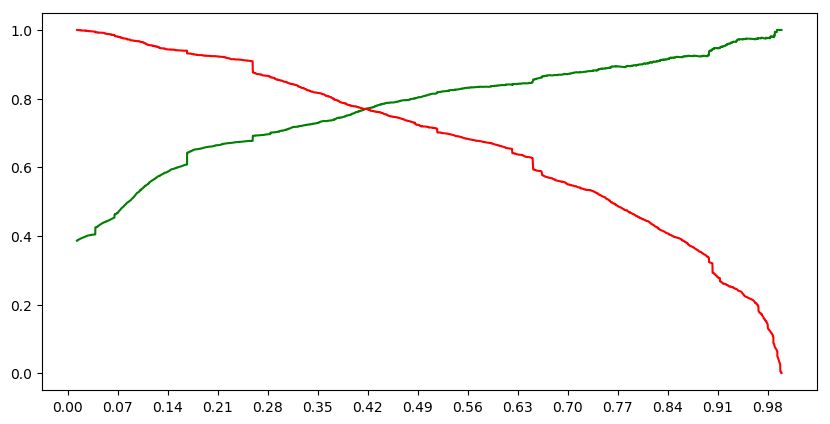

In [195]:
plt.figure(figsize=(10,5), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.07))
plt.show()

## making predictions on test set.

In [196]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test
[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,org_API,org_Landing Page Submission,src_Facebook,src_Olark Chat,src_Welingak Website,occp_Unemployed,occp_Working Professional,last_note_Had a Phone Conversation,last_note_SMS Sent,last_note_Unreachable,last_note_Unsubscribed,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation
6190,0,-0.872062,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
7073,0,-0.615211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,1,-0.872062,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
607,0,-0.872062,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
440,0,-0.094170,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Adding a constant.

In [198]:
X_test_sm = sm.add_constant(X_test) 

In [199]:
## making predictions 
y_test_pred = res.predict(X_test_sm)

In [200]:
y_test_pred[:10]

6190    0.011389
7073    0.074667
4519    0.071089
607     0.994026
440     0.120871
4247    0.062726
7431    0.074836
726     0.339914
7300    0.065029
4046    0.167337
dtype: float64

In [201]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [202]:
y_pred_1.head()

,0
6190,0.011389
7073,0.074667
4519,0.071089
607,0.994026
440,0.120871


In [203]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [204]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [205]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [206]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [207]:
y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.011389
1,0,7073,0.074667
2,0,4519,0.071089
3,1,607,0.994026
4,0,440,0.120871


In [208]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [209]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['LeadID','Converted','Conversion_Prob'], axis=1)

In [210]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,6190,0,0.011389
1,7073,0,0.074667
2,4519,0,0.071089
3,607,1,0.994026
4,440,0,0.120871


In [211]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [212]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.011389,0
1,7073,0,0.074667,0
2,4519,0,0.071089,0
3,607,1,0.994026,1
4,440,0,0.120871,0


In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8204430625728721

In [214]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1284,  293],
       [ 169,  827]], dtype=int64)

In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8303212851405622

In [217]:
# Let us calculate specificity
TN / float(TN+FP)

0.8142041851616995

In [218]:
# Calculate false postive rate - predicting converted when customer does not have convert
print(FP/ float(TN+FP))

0.18579581483830057


In [219]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7383928571428572


In [220]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8836889194769443


### Precision

In [221]:
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision

0.7383928571428572

### Recall

In [222]:
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall

0.8303212851405622

In [223]:
## The F1 score

In [224]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.781663516068053

## Classification Report

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1577
           1       0.74      0.83      0.78       996

   micro avg       0.82      0.82      0.82      2573
   macro avg       0.81      0.82      0.81      2573
weighted avg       0.83      0.82      0.82      2573



### to avoid overfitting,lets compute validation  score and see how model performs

In [226]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[0.65577596 0.81096849 0.81330222 0.81606519 0.82263711 0.84830805
 0.85064177 0.85913853 0.86946387 0.87514586]
0.8221447057969676


C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## plotting ROC curve for test dataset


In [227]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [228]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

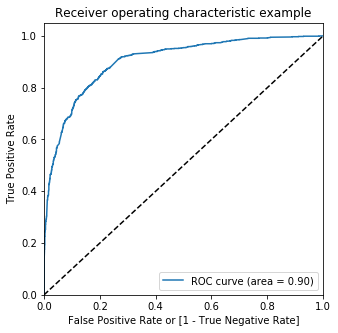

(array([0.        , 0.        , 0.        , ..., 0.99873177, 0.99936588,
        1.        ]),
 array([0.        , 0.00100402, 0.00200803, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99928262e+00, 9.99282620e-01, 9.99209345e-01, ...,
        1.60891899e-03, 1.53242471e-03, 7.57313797e-04]))

In [229]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [230]:
## Calculating area under yhe curve.
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [231]:
auc= auc_val(fpr,tpr)
auc

0.9034877620819393

### we got area under the curve  = 0.903 , which represents good work is done on test set

## Calculating lead score

### lead score= conversion probablity *100

In [232]:
leads_test_pred= y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.011389,0
1,7073,0,0.074667,0
2,4519,0,0.071089,0
3,607,1,0.994026,1
4,440,0,0.120871,0


In [233]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.289109,8529,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.128974,7331,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.823963,7688,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.049914,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.038796,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [234]:
# Dropping unnecessary columns from train dataset
leads_train_pred= leads_train_pred[['LeadID','Converted','Conversion_prob','final_Predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_prob,final_Predicted
0,8529,0,0.289109,0
1,7331,0,0.128974,0
2,7688,1,0.823963,1
3,92,0,0.049914,0
4,4908,0,0.038796,0


In [235]:
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.011389,0
1,7073,0,0.074667,0
2,4519,0,0.071089,0
3,607,1,0.994026,1
4,440,0,0.120871,0


In [236]:
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Conversion_Prob,Conversion_prob,Converted,LeadID,final_Predicted,final_predicted
0,NaN,0.289109,0,8529,0.0,NaN
1,NaN,0.128974,0,7331,0.0,NaN
2,NaN,0.823963,1,7688,1.0,NaN
3,NaN,0.049914,0,92,0.0,NaN
4,NaN,0.038796,0,4908,0.0,NaN


In [237]:
lead_full_pred= lead_full_pred.drop(['Conversion_Prob','final_predicted'],axis=1)
lead_full_pred.head()

,Conversion_prob,Converted,LeadID,final_Predicted
0,0.289109,0,8529,0.0
1,0.128974,0,7331,0.0
2,0.823963,1,7688,1.0
3,0.049914,0,92,0.0
4,0.038796,0,4908,0.0


In [238]:
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [239]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [240]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

ValueError: cannot convert float NaN to integer